# Personal JEM/63x Tracker 2018

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import post_patch as pp #post patch script

sns.set(style = "whitegrid")
sns.set_context('notebook')

### Creating Dataframes: json_df, morph_df, merged_df

In [2]:
def get_json_df():
    """To create json_df(dates:2017-10-02 to 2019-01-15).
    
    Arguements: None
    
    Returns: json_df
    """
        
    json_df = pd.read_csv("C:/users/ramr/documents/github/personal-projects/csv/jem_metadata.csv")
    json_df = json_df[json_df['status'] == 'SUCCESS']
    
    json_df.dropna(subset = ['container', 'cell_depth'], inplace = True)
    json_df = json_df[json_df['container'].str.match('PA')]

    #Creates patch_duration column and outputs in minutes
    json_df['patch_duration'] = pd.to_datetime(json_df['extraction.timeRetractionEnd']) - pd.to_datetime(json_df['recording.timeWholeCellStart'])
    json_df['patch_duration'] = (json_df['patch_duration'].astype('timedelta64[s]'))/60

    json_df = pp.postpatch_reclass(json_df) #Makes post patch column with the script

    json_df = json_df[['date', 
                       'container', 
                       'patch_duration',
                       'cell_depth',
                       'extraction.endPipetteR',
                       'post_patch']]
                       #'extraction.extractionNotes']]
    
    json_df['date'] = json_df['date'].str[:10] #Strip away the time
    json_df['date'] = pd.to_datetime(json_df['date']) #Converting to YYYY-MM-DD
    json_df.sort_values(by = ['date'], inplace = True) #Sorts date column
    return json_df

In [3]:
def get_morph_df():
    """To create morph_df with 63x images information.
    
    Arguements: None
    
    Returns: morph_df
    """
    
    morph_df = pd.read_csv("C:/users/ramr/documents/github/personal-projects/csv/63x.csv")
    morph_df = morph_df.loc[:,['patched_cell_container', 
                               'ims63x_go_no_go', 
                               'ims63x_imaging_started', 
                               'image_series_63x_qc',
                               'link_ims_20x',
                               'link_ims_63x']]
    morph_df.sort_values(by = ['patched_cell_container'], inplace=True) #Sorts date column
    return morph_df

In [4]:
def merge_dfs(df1, df2):
    """To create merged_df(dates:???) by merging two dataframes on patch container.
    
    Arguements: 
        df1: pandas dataframe on left merge
        df2: pandas dataframe on right merge
        
    Returns: merged_df
    """
    
    merged_df = pd.merge(left = df1, 
                         right = df2, 
                         left_on = 'container',
                         right_on = 'patched_cell_container',
                         how = 'inner')
    merged_df.dropna(subset=['ims63x_go_no_go'], inplace = True)
    merged_df.drop(columns=['patched_cell_container'], inplace=True)
    merged_df.sort_values(by = ['date'], inplace=True) #Sorts date column
    return merged_df

##### Sorting df to display only 2018 data: final_all_df

In [5]:
def sort_df(df):
    """To sort dataframe to only show 2018 data.
    
    Arguements: 
        df: pandas dataframe
        
    Returns: df
    """
    
    df = df.set_index('date') #Set date column as index column 
    start_date = '2018-01-01'
    end_date = '2019-07-31'
    df = df[start_date:end_date] #Choosing start & end date
    df.sort_index(inplace=True)
    df.reset_index(inplace=True)
    return df

##### Making global variables

In [6]:
json_df = get_json_df()
morph_df = get_morph_df()
merged_df = merge_dfs(json_df, morph_df)
final_all_df = sort_df(merged_df) #final_all_df Dates: 2018-01-03 to 2018-11-20

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2818: DtypeWarning: Columns (6,11,13,19,20,31,35,45,65) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

### Display df

In [7]:
json_df.head(1)

,date,container,patch_duration,cell_depth,extraction.endPipetteR,post_patch
6,2017-10-02,PAS4_171002_451_A01,11.866667,47.4,10.2,No-low seal


In [8]:
json_df.tail(1)

,date,container,patch_duration,cell_depth,extraction.endPipetteR,post_patch
9588,2019-07-30,PAS4_190730_458_A01,7.5,48.9,1000.0,Nuc-high seal


In [9]:
final_all_df.head(1)

,date,container,patch_duration,cell_depth,extraction.endPipetteR,post_patch,ims63x_go_no_go,ims63x_imaging_started,image_series_63x_qc,link_ims_20x,link_ims_63x
0,2018-01-03,PAS4_180103_452_A01,9.083333,33.8,1500.0,Nuc-high seal,63x go,63x imaging started,deferred,http://lims2/focal_plane_image_series?id=65748...,http://lims2/focal_plane_image_series?id=66389...


In [10]:
final_all_df.tail(1)

,date,container,patch_duration,cell_depth,extraction.endPipetteR,post_patch,ims63x_go_no_go,ims63x_imaging_started,image_series_63x_qc,link_ims_20x,link_ims_63x
548,2019-04-08,PAS4_190408_455_A01,17.316667,45.9,900.0,Nuc-high seal,63x go,NaN,NaN,http://lims2/focal_plane_image_series?id=85518...,NaN


### Dataframe into Excel sheet

In [11]:
#Outputing dataframe as excel sheet
#writer = pd.ExcelWriter('TITLE.xlsx')
#dataframe.to_excel(writer, 'Sheet#)

#If error message is 'Permission denied' then you have the excel sheet open

In [12]:
#Dataframe with only nuc-high seal
final_nuc_df = final_all_df[final_all_df['post_patch']=='Nuc-high seal']

#Making df into excel sheets
writer = pd.ExcelWriter('C:/users/ramr/documents/github/personal-projects/Excel/Morphology.xlsx')
final_all_df.to_excel(writer, 'All_63x', freeze_panes=(1,0))
final_nuc_df.to_excel(writer, 'Only_Nuc-high_63x', freeze_panes=(1,0))
writer.save()

# Plots

In [13]:
#Constant and reused variables 
colors = ['#31a354', '#a1d99b', '#fc9272', '#de2d26', '#f7fcb9'] #For seaborn plots
x_order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal', 'Entire cell']

### Bar, Pie & Boxplot

In [14]:
def bar_plot(df): 
    """To create a horizontal bar graph using df converted to pivot table.
    
    Arguements:
        df: pandas dataframe
    
    Returns: None
    """
    
    df1 = df.groupby(['post_patch']).size().reset_index(name = 'count')
    
    plt.subplots(figsize=(8,5)) #Has to be before the plot to work
    
    ax = sns.barplot(x = 'count', y = 'post_patch', order = x_order, palette = colors, saturation = 1, data = df1)
    ax.set(xlabel = 'Count', ylabel = 'Post Patch Outcomes')
    ax.set_title("Counts of Post Patch Outcomes for User")
    
    for p in ax.patches: #Figure out how this loop works
        value = p.get_width()
        ax.text(value, p.get_y() + p.get_height()/2 + 0.1, '{:1.0f}'.format(value), ha = "left", fontsize = 12)
        
# + 0.1 = chooses location of the value vertically

In [15]:
def pie_plot(df):
    """To create a pie chart using df converted to pivot table.
    
    Arguements:
        df: pandas dataframe
    
    Returns: None
    """
    
    df1 = df.groupby(['post_patch']).size().reset_index(name = 'count')
    df1.set_index('post_patch', inplace = True)
    
    explode = (0.05, 0.05, 0.05, 0.05, 0.05) #splits the categories
    colors = ['#f7fcb9','#fc9272', '#de2d26', '#31a354', '#a1d99b']
    #Entire, No-high, No-low, Nuc-high, Nuc-low
    #Yellow, Light Red, Red, Green, Light Green
    
    df1.plot.pie(y = 'count', autopct='%1.1f%%', figsize = (8,8), shadow = True, legend = False, 
                 explode = explode, colors = colors)
    plt.title('Post Patch Percentage', loc = 'center', fontsize = 14)
    plt.axes().set_ylabel('')

In [16]:
def box_plot(df):
    """To create a box plot using df.
    
    Arguements:
        df: pandas dataframe
    
    Returns: None
    """
    
    bp = sns.boxplot(x = 'post_patch', y = 'patch_duration', data = df, order = x_order, palette = colors)
    bp.set(ylim=(0, 20)) #To cutoff outliers

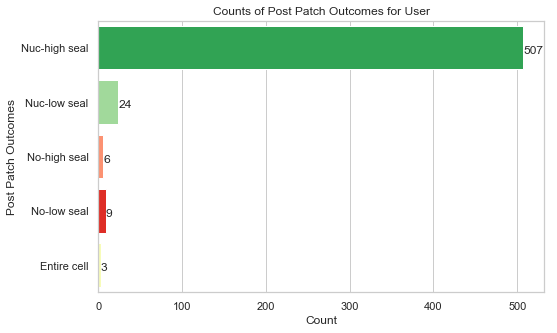

In [17]:
bar_plot(final_all_df)

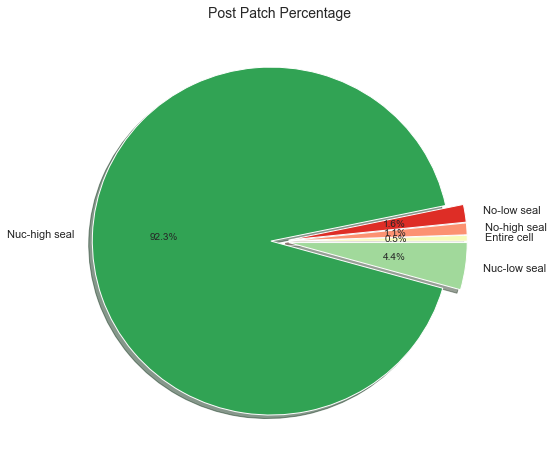

In [18]:
pie_plot(final_all_df)

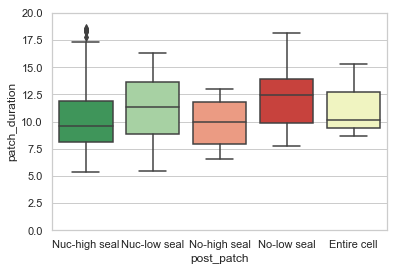

In [19]:
box_plot(final_all_df)

### Histogram plot of depth vs post_patch 

In [20]:
#Histogram plot dfs
nuh_df = final_all_df[final_all_df['post_patch'] == 'Nuc-high seal']
nul_df = final_all_df[final_all_df['post_patch'] == 'Nuc-low seal']
noh_df = final_all_df[final_all_df['post_patch'] == 'No-high seal']
nol_df = final_all_df[final_all_df['post_patch'] == 'No-low seal']
ent_df = final_all_df[final_all_df['post_patch'] == 'Entire cell']

def hist(df, colors):
    """To create a histogram plot using df.
    
    Arguements:
        df: pandas dataframe
        colors: color
    
    Returns: None
    """
    
    bins = np.arange(0, 100, 5) #Displays cell depth 0 to 100 um, split by 5 
    ax = sns.distplot(df["cell_depth"], bins=bins, kde=False, color=colors)
    #kde = kernal density estimate line
    ax.set(xlabel = 'Cell Depth(um)', ylabel = 'Count of nucleated patch')
    ax.set_title("Counts of nucleated patches at cell depth")
    
#colors = ['#31a354', '#a1d99b', '#fc9272', '#de2d26', '#f7fcb9']

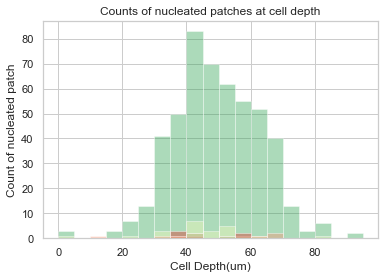

In [21]:
hist(nuh_df, '#31a354')
hist(nul_df, '#f7fcb9')
hist(noh_df, '#de2d26')
hist(nol_df, '#fc9272')
hist(ent_df, '#a1d99b')
#You can display these separately also

### Boxplot of patch duration vs morph calls by post patch outcomes

[<matplotlib.text.Text at 0xdf02c18>, <matplotlib.text.Text at 0xdf1fe48>]

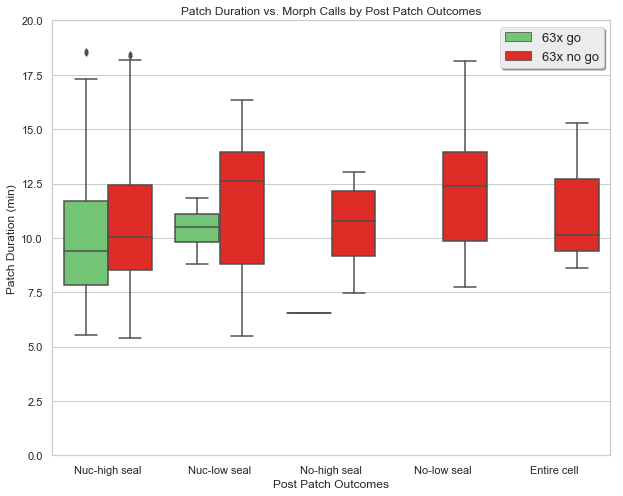

In [22]:
plt.subplots(figsize=(10,8)) #Has to be before the plot to work

bp = sns.boxplot(x = 'post_patch', y = 'patch_duration', hue = 'ims63x_go_no_go', order = x_order, 
                 hue_order = ['63x go','63x no go'], data = final_all_df, palette = ['#74c476', '#de2d26'],
                 saturation = 1, fliersize = 4)
bp.legend(loc = 0, 
          #bbox_to_anchor = (0.95, 1), 
          frameon = True, 
          shadow = True,
          fontsize = 13)
bp.set(ylim=(0, 20)) #To cutoff outliers

bp.set_title('Patch Duration vs. Morph Calls by Post Patch Outcomes')
bp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Patch Duration (min)')

### Dataframe Info

In [23]:
def df_info():
    """To view information about the multiple dataframes.
    
    Arguements: None
    
    Returns: None
    """
    print("json_df")
    json_df.info()
    print()
    print("merged_df")
    merged_df.info()
    print()
    print("final_all_df")
    final_all_df.info()
    print()
    print("final_nuc_df")
    final_nuc_df.info()

In [24]:
df_info()

json_df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 6 to 9588
Data columns (total 6 columns):
date                      1294 non-null datetime64[ns]
container                 1294 non-null object
patch_duration            1294 non-null float64
cell_depth                1294 non-null float64
extraction.endPipetteR    1294 non-null float64
post_patch                1294 non-null object
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 70.8+ KB
()
merged_df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 962
Data columns (total 11 columns):
date                      616 non-null datetime64[ns]
container                 616 non-null object
patch_duration            616 non-null float64
cell_depth                616 non-null float64
extraction.endPipetteR    616 non-null float64
post_patch                616 non-null object
ims63x_go_no_go           616 non-null object
ims63x_imaging_started    298 non-null object
image_series_63x_qc     

In [25]:
final_all_df['post_patch'].value_counts()

Nuc-high seal    507
Nuc-low seal      24
No-low seal        9
No-high seal       6
Entire cell        3
Name: post_patch, dtype: int64

In [26]:
final_all_df['ims63x_go_no_go'].value_counts()

63x go       291
63x no go    258
Name: ims63x_go_no_go, dtype: int64